In [159]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys
import cv2 as cv

In [56]:
data = []
for file in os.listdir('./Data/'): #FIVES dataset
    if file.endswith('.png'):
        data.append(file)
print(len(data)) #checking that there are 200 images

200
['100_D.png', '101_G.png', '102_G.png', '103_G.png', '104_G.png', '105_G.png', '106_G.png', '107_G.png', '108_G.png', '109_G.png', '10_A.png', '110_G.png', '111_G.png', '112_G.png', '113_G.png', '114_G.png', '115_G.png', '116_G.png', '117_G.png', '118_G.png', '119_G.png', '11_A.png', '120_G.png', '121_G.png', '122_G.png', '123_G.png', '124_G.png', '125_G.png', '126_G.png', '127_G.png', '128_G.png', '129_G.png', '12_A.png', '130_G.png', '131_G.png', '132_G.png', '133_G.png', '134_G.png', '135_G.png', '136_G.png', '137_G.png', '138_G.png', '139_G.png', '13_A.png', '140_G.png', '141_G.png', '142_G.png', '143_G.png', '144_G.png', '145_G.png', '146_G.png', '147_G.png', '148_G.png', '149_G.png', '14_A.png', '150_G.png', '151_N.png', '152_N.png', '153_N.png', '154_N.png', '155_N.png', '156_N.png', '157_N.png', '158_N.png', '159_N.png', '15_A.png', '160_N.png', '161_N.png', '162_N.png', '163_N.png', '164_N.png', '165_N.png', '166_N.png', '167_N.png', '168_N.png', '169_N.png', '16_A.png', '

[432. 288.]
[432. 288.]
[432. 288.]
[432. 288.]
[432. 288.]


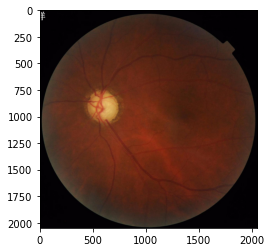

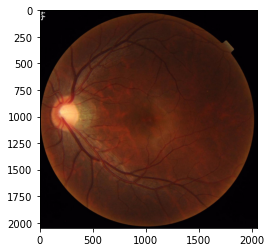

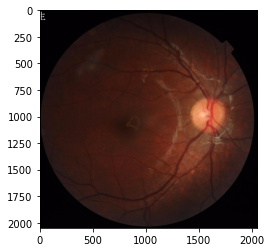

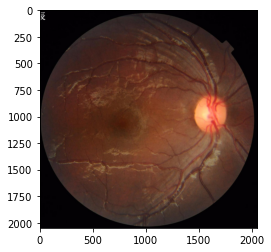

In [86]:
for i in range(50):
    ran = random.choice(data)
    img = plt.imread(os.path.join('./Data/', ran))
    fig = plt.figure()
    plt.imshow(img)
    # size = fig.get_size_inches()*fig.dpi #in case we want to check the image size
    # print(size)

plt.close()

In [62]:
#pixel distribution
diagnosis = {}
for j in data:
    if len(j)<9:
        j = j.zfill(9)
    diagnosis[j[0:3]]= j[4:5]

df = pd.DataFrame(diagnosis.items(), columns=['IMG_no', 'Diagnosis'])

    IMG_no Diagnosis
0      118         G
1      168         N
2      034         A
3      195         N
4      091         D
..     ...       ...
195    114         G
196    164         N
197    060         D
198    199         N
199    038         A

[200 rows x 2 columns]


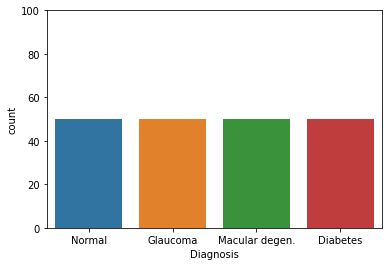

In [81]:
#histogram of diagnoses
ax = sns.countplot(x="Diagnosis",data=df)
ax = ax.set_xticklabels(['Normal', 'Glaucoma', 'Macular degen.', 'Diabetes'])
ax = plt.ylim(0,100)

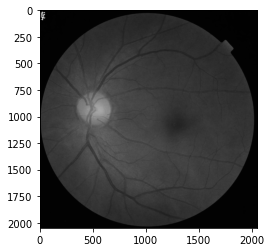

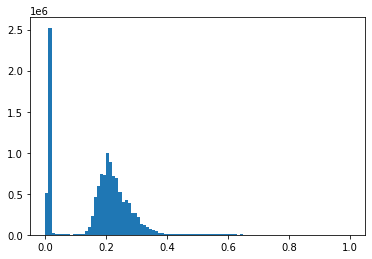

In [144]:
#histogram of intensity distribution
for im in data[0:1]:
    img = plt.imread(os.path.join('./Data/', im))
    img_grey = np.copy(img)
    img_grey[:] = img.mean(axis=-1,keepdims=1)
    plt.imshow(img_grey)
    pixels = img_grey.flatten()

f, ax1 = plt.subplots(1)
cnts, bins = np.histogram(pixels,bins=100)
ax1 = ax1.hist(pixels, bins=100)

In [136]:
img_r = img[:,:,0]
img_g = img[:,:,1]
img_b = img[:,:,2]

In [137]:
img_r_pixels = img_r.flatten()
img_g_pixels = img_g.flatten()
img_b_pixels = img_b.flatten()

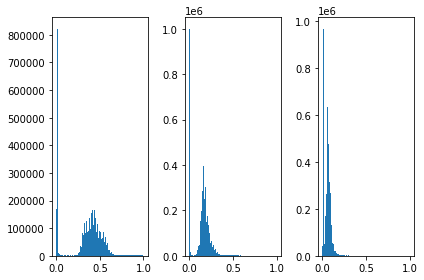

In [142]:
ax2 = plt.subplot(1,3,1)
ax2 = plt.hist(img_r_pixels,bins=100)
ax2 = plt.subplot(1,3,2)
ax2 = plt.hist(img_g_pixels,bins=100)
ax2 = plt.subplot(1,3,3)
ax2 = plt.hist(img_b_pixels,bins=100)
ax2 = plt.tight_layout()